# Tabular Neural Net

In [2]:
from fastai.tabular import *
from fastai.vision import Path

Tabular data should be in a Pandas `DataFrame`.

In [3]:
gender = 'men'
file = 'normalized_' + gender + '.csv'
path = Path('data')

In [4]:
df = pd.read_csv(path/file)

In [5]:
dep_var = 'Success'
cat_names = ['Tech', 'Direction']
cont_with_def = ['Serve_X', 'Serve_Y', 'Reception_X', 'Reception_Y', 'Set_X', 'Set_Y', 'Attack_X', 'Attack_Y', 'Inrun_X', 'Inrun_Y', 'Defense_X', 'Defense_Y']
cont_without_def = ['Serve_X', 'Serve_Y', 'Reception_X', 'Reception_Y', 'Set_X', 'Set_Y', 'Attack_X', 'Attack_Y', 'Inrun_X', 'Inrun_Y']
procs = [FillMissing, Categorify]

In [35]:
data = (TabularList.from_df(df, path=path, cont_names=cont_without_def, cat_names=cat_names, procs=procs)
                           .split_by_rand_pct(valid_pct=0.2)
                           .label_from_df(cols=dep_var)
                           .databunch())

In [7]:
data.show_batch(rows=3)

Serve_X,Serve_Y,Reception_X,Reception_Y,Set_X,Set_Y,Attack_X,Attack_Y,Inrun_X,Inrun_Y,target
0.5000,0.9722,0.6600,0.3889,0.5000,0.4628,0.1800,0.4628,0.2800,0.3239,True
0.2000,0.9722,0.1800,0.0922,0.5000,0.3889,0.3400,0.4628,0.1900,0.2961,True
0.8000,0.9722,0.3400,0.1667,0.5000,0.4633,0.1800,0.4633,0.2800,0.3244,True
0.2000,0.9722,0.6600,0.1667,0.5000,0.3150,0.6600,0.4633,0.7600,0.3244,True
0.8000,0.9722,0.6600,0.2411,0.5000,0.3889,0.8200,0.4633,0.9700,0.2967,True


In [15]:
learn = tabular_learner(data, layers=[200,100,50,20], metrics=[accuracy, error_rate])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


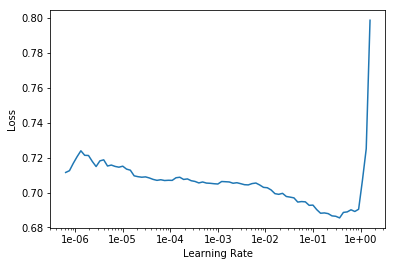

In [8]:
lr_find(learn)
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.677374,0.681295,0.623057,0.376943,00:01
1,0.665066,0.659901,0.627457,0.372543,00:01
2,0.659824,0.656007,0.628923,0.371077,00:01
3,0.661094,0.655885,0.629217,0.370783,00:01
4,0.657193,0.655917,0.632444,0.367556,00:01


In [10]:
learn.save('first_try_' + gender)

In [11]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=50, bias=True)
    (7): ReLU(inplace)
    (8): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=50, out_features=20, bias=True)
    (10): ReLU(inplace)
    (11): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=20, out_features=2, bias=True)
  )
)

Compare prediction with general success rate:

In [23]:
counts = df['Success'].value_counts()
counts[True] / len(df)

0.6226094098322187

## Inference

In [ ]:
row = df.iloc[0]

In [ ]:
learn.predict(row)